In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

In [2]:
# Reading dataset to python
df=pd.read_csv('dataset w7.csv')
df

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


# 1. Carry out descriptive analytics on the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [5]:
df.shape


(28, 3)

We have 28 rows and 3 Columns in the dataset.

In [6]:
df.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

There are no null values in the data set

<AxesSubplot:xlabel='Gender', ylabel='count'>

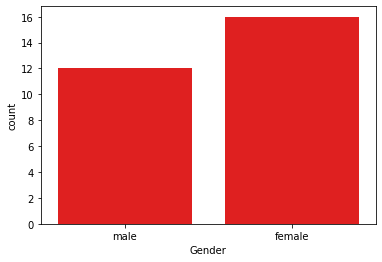

In [11]:
# Visualization of the count of male and female students
sns.countplot(data = df, x='Gender',color='red')

In the given data, count of females is higher than the count of males

<AxesSubplot:xlabel='Test preparation', ylabel='count'>

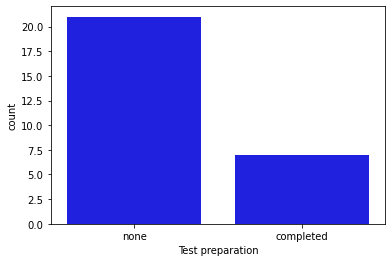

In [12]:
# Visualization of the count of  students who completed test preparation
sns.countplot(data = df, x='Test preparation',color='blue')


Number of students who completed test preparation is less than compared to those who didn't 

In [10]:
df1 = df[['Gender','Total Marks']].groupby('Gender').describe()
df1

Total Marks                                                      
             count       mean        std   min    25%   50%    75%   max
Gender                                                                  
female        16.0  33.750000  12.865976  12.0  25.50  39.0  43.50  50.0
male          12.0  30.416667  12.168950  14.0  21.75  29.0  43.25  47.0

From the above analysis we can conclude that :

There are 16 females and 12 males .
The descriptive statistics  summarizes the central tendency, maximum and minimum values , and percentile of marks of both 
males and females

<AxesSubplot:xlabel='Gender', ylabel='count'>

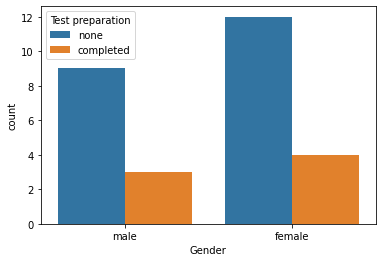

In [35]:
sns.countplot(x='Gender',data=df,hue='Test preparation')

From this plot , we found the count of male and female students who completed and not completed  the test preparation

# 2. Check whether female and male students scored the same marks.


Ho : Male and female students did not score the same marks


Ha : Male and female students scored the same marks

In [15]:
df_male = df[df['Gender']=='male']['Total Marks']
df_male

0     14
6     30
8     18
9     24
10    44
11    23
12    43
13    28
18    47
19    36
20    14
21    44
Name: Total Marks, dtype: int64

In [16]:
df_female = df[df['Gender']=='female']['Total Marks']
df_female

1     28
2     18
3     48
4     21
5     40
7     12
14    41
15    13
16    48
17    45
22    41
23    27
24    27
25    38
26    50
27    43
Name: Total Marks, dtype: int64

In [19]:
alpha=0.05
_,p = ttest_ind(df_male,df_female)
print("p value :", p)

p value : 0.4937822317960763


In [20]:
if p < alpha:
    print("Rejecting H0")
else:
    print("Failing to reject H0")

Failing to reject H0


From the t-test we can conclude that, male and female students did not score the same marks.

# 3. Whether test preparation helps the students?

Ho : Test preparation does not help the students

Ha : Test preparation helps the students

In [21]:
df_none = df[df['Test preparation']=='none']['Total Marks']
df_none

0     14
1     28
2     18
3     48
4     21
6     30
7     12
8     18
9     24
11    23
13    28
14    41
15    13
17    45
18    47
19    36
20    14
22    41
23    27
24    27
25    38
Name: Total Marks, dtype: int64

In [22]:
df_completed = df[df['Test preparation']=='completed']['Total Marks']
df_completed

5     40
10    44
12    43
16    48
21    44
26    50
27    43
Name: Total Marks, dtype: int64

In [23]:
alpha=0.05
_,p = ttest_ind(df_none,df_completed)
print("p value :", p)

p value : 0.0012671292457320106


In [24]:
if p < alpha:
    print("Rejecting H0")
else:
    print("Failing to reject H0")

Rejecting H0


Here, from the t-test we can conclude that, test preparation helps the students